ALAGNAK RIVER
TOP 10 FEATURES 🏆

Gradient Boosting Evaluation Metrics (Alagnak, Top 10 Features):
R²   (R-squared):              -0.4153
MSE  (Mean Squared Error):     4932313075239.90
MAPE (Mean Absolute % Error):  32.08%

Polynomial Regression Evaluation Metrics (Alagnak, Top 7 Features):
R²   (R-squared):              -11.5956
MSE  (Mean Squared Error):     43896828007120.18
MAPE (Mean Absolute % Error):  78.37%

Linear Regression Evaluation Metrics (Alagnak, Top 10 Features):
R²   (R-squared):              -0.4404
MSE  (Mean Squared Error):     5020013275318.09
MAPE (Mean Absolute % Error):  33.81%

Random Forest Evaluation Metrics (Alagnak, Top 10 Features): 🏆
R²   (R-squared):              0.0283
MSE  (Mean Squared Error):     3386374415202.25
MAPE (Mean Absolute % Error):  35.77%

Random Forest with Log-Transformed Target (Alagnak, Top 10 Features):
R²   (R-squared):              -0.3730
MSE  (Mean Squared Error):     4785084733265.15
MAPE (Mean Absolute % Error):  28.87%

Random Forest + Log-Transformed Target + GridSearchCV (Alagnak, Top 8 Features):
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R²   (R-squared):              -0.3843
MSE  (Mean Squared Error):     4824448852200.56
MAPE (Mean Absolute % Error):  29.90%

XGBoost Evaluation Metrics (Alagnak, Top 9 Features):
R²   (R-squared):              -0.4310
MSE  (Mean Squared Error):     4987293784854.80
MAPE (Mean Absolute % Error):  32.88%

GradientBoostingRegressor

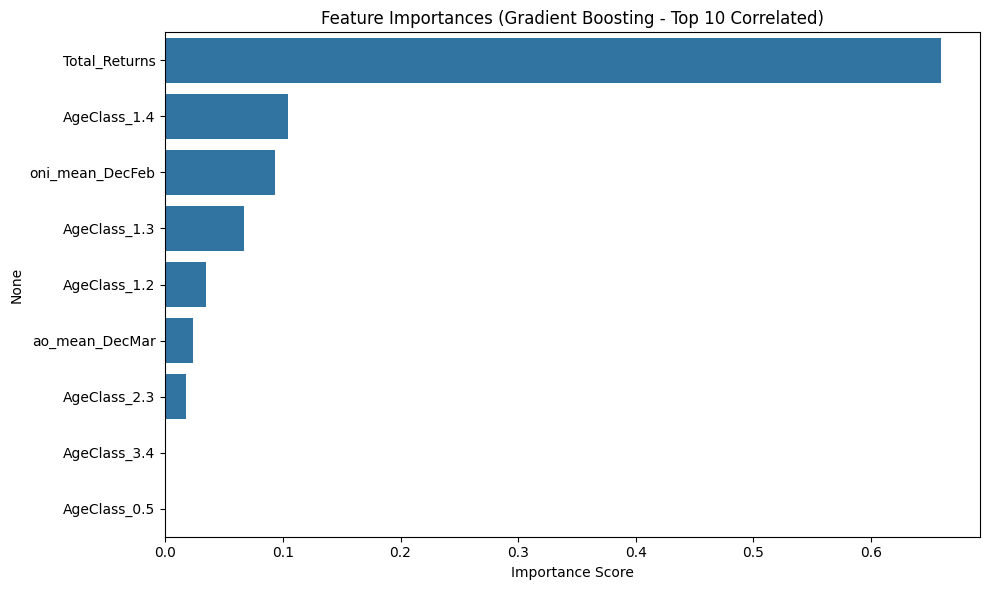

Gradient Boosting Evaluation Metrics (Alagnak, Top 10 Features):
R²   (R-squared):              -0.4153
MSE  (Mean Squared Error):     4932313075239.90
MAPE (Mean Absolute % Error):  32.08%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Select top 10 features most correlated with the target ===
correlation = df_alagnak.corr(numeric_only=True)
target_corr = correlation['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top10_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Ensure column order and include Year, River, Target
columns_to_keep = top10_features + [col for col in ['Total_Returns_NextYear', 'Year', 'River'] if col not in top10_features]
df_alagnak = df_alagnak[columns_to_keep].sort_values(by='Year').reset_index(drop=True)

# === Step 3: Define and apply time-based split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 4: Prepare features and target ===
drop_columns = ['Total_Returns_NextYear', 'River', 'Year']
X_train = data_train.drop(columns=drop_columns).reset_index(drop=True)
y_train = data_train['Total_Returns_NextYear'].reset_index(drop=True)
X_test = data_test.drop(columns=drop_columns).reset_index(drop=True)
y_test = data_test['Total_Returns_NextYear'].reset_index(drop=True)

# === Step 5: Train Gradient Boosting Regressor ===
gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
gbr.fit(X_train, y_train)

# === Step 6: Feature Importances Plot ===
feature_importances = pd.Series(gbr.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Gradient Boosting - Top 10 Correlated)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 7: Predict & Evaluate ===
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Gradient Boosting Evaluation Metrics (Alagnak, Top 10 Features):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Polynomial Regression

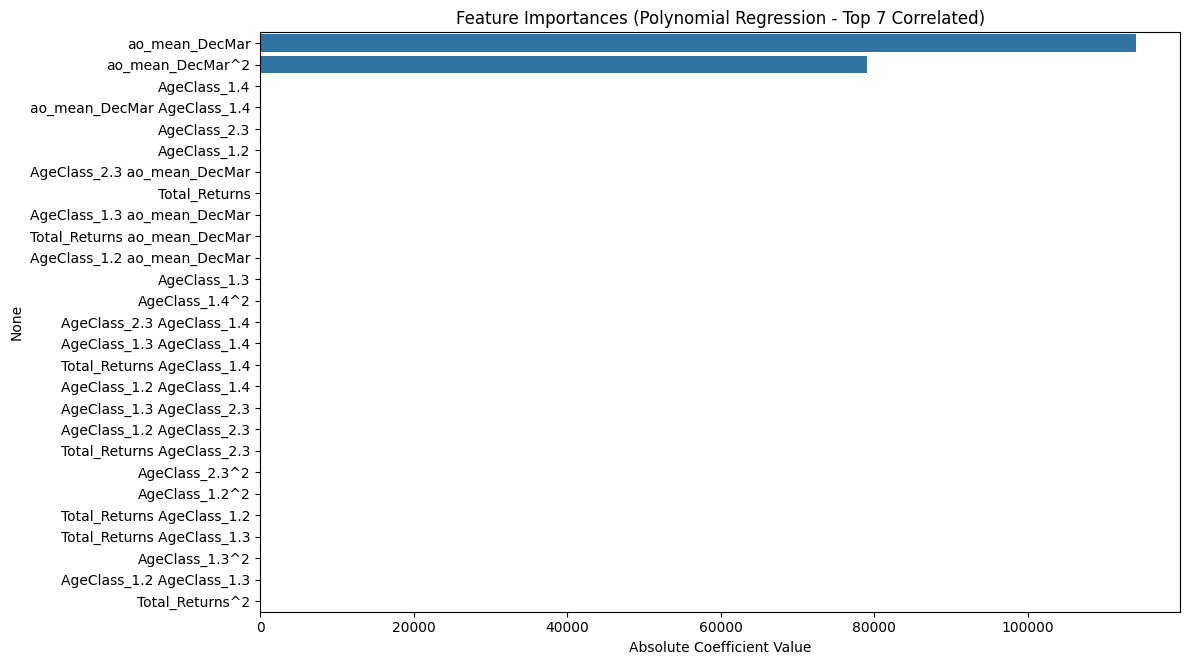

Polynomial Regression Evaluation Metrics (Alagnak, Top 7 Features):
R²   (R-squared):              -11.5956
MSE  (Mean Squared Error):     43896828007120.18
MAPE (Mean Absolute % Error):  78.37%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Filter only 'Alagnak' river
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Select top 7 features most correlated with the target ===
correlation = df_alagnak.corr(numeric_only=True)
target_corr = correlation['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top7_features = target_corr.abs().sort_values(ascending=False).head(7).index.tolist()

# Keep only top 7 + Year, River, and Target
columns_to_keep = top7_features + [col for col in ['Total_Returns_NextYear', 'Year', 'River'] if col not in top7_features]
df_alagnak = df_alagnak[columns_to_keep].sort_values(by='Year').reset_index(drop=True)

# === Step 3: Time-based train/test split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 4: Prepare features and targets ===
drop_columns = ['Total_Returns_NextYear', 'River', 'Year']
X_train = data_train.drop(columns=drop_columns).reset_index(drop=True)
y_train = data_train['Total_Returns_NextYear'].reset_index(drop=True)
X_test = data_test.drop(columns=drop_columns).reset_index(drop=True)
y_test = data_test['Total_Returns_NextYear'].reset_index(drop=True)

# === Step 5: Polynomial Features + Linear Regression ===
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

feature_names = poly.get_feature_names_out(X_train.columns)

model = LinearRegression()
model.fit(X_train_poly, y_train)

# === Step 6: Plot Coefficients ===
coefficients = pd.Series(model.coef_, index=feature_names)
top_features = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(12, max(6, len(top_features) * 0.25)))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Polynomial Regression - Top 7 Correlated)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# === Step 7: Predict & Evaluate ===
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Polynomial Regression Evaluation Metrics (Alagnak, Top 7 Features):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Linear Regression

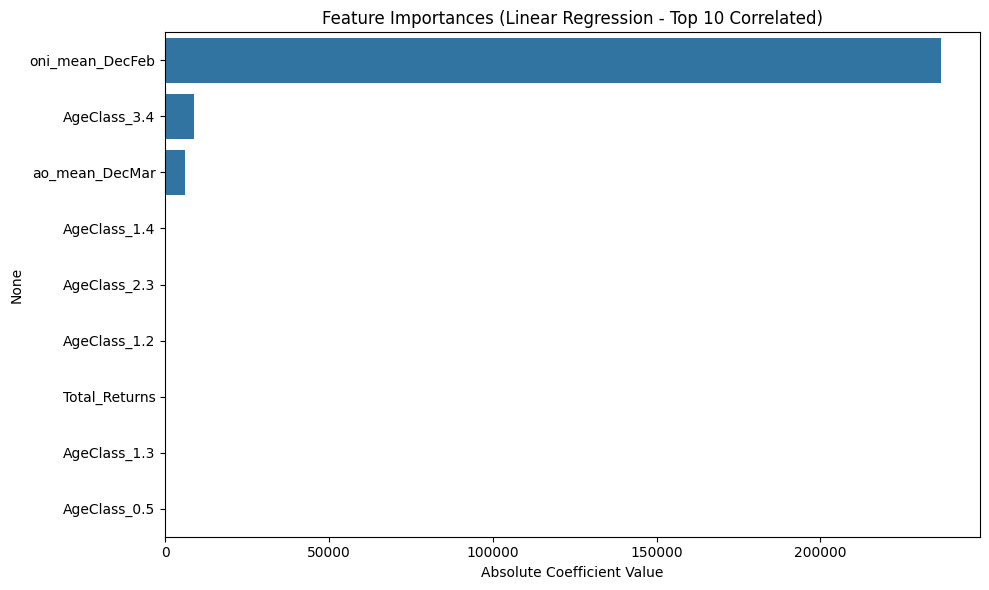

Linear Regression Evaluation Metrics (Alagnak, Top 10 Features):
R²   (R-squared):              -0.4404
MSE  (Mean Squared Error):     5020013275318.09
MAPE (Mean Absolute % Error):  33.81%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Filter for 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Select top 10 correlated features ===
correlation = df_alagnak.corr(numeric_only=True)
target_corr = correlation['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top10_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Force consistent column order and avoid duplication
columns_to_keep = top10_features + [col for col in ['Total_Returns_NextYear', 'Year', 'River'] if col not in top10_features]
df_alagnak = df_alagnak[columns_to_keep].sort_values(by='Year').reset_index(drop=True)

# === Step 3: Time-based train/test split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 4: Prepare features and target ===
drop_columns = ['Total_Returns_NextYear', 'River', 'Year']
X_train = data_train.drop(columns=drop_columns).reset_index(drop=True)
y_train = data_train['Total_Returns_NextYear'].reset_index(drop=True)
X_test = data_test.drop(columns=drop_columns).reset_index(drop=True)
y_test = data_test['Total_Returns_NextYear'].reset_index(drop=True)

# === Step 5: Train Linear Regression ===
model = LinearRegression()
model.fit(X_train, y_train)

# === Step 6: Plot Coefficients ===
coefficients = pd.Series(model.coef_, index=X_train.columns)
top_features = coefficients.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Linear Regression - Top 10 Correlated)")
plt.xlabel("Absolute Coefficient Value")
plt.tight_layout()
plt.show()

# === Step 7: Predict & Evaluate ===
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Linear Regression Evaluation Metrics (Alagnak, Top 10 Features):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Random Forest model

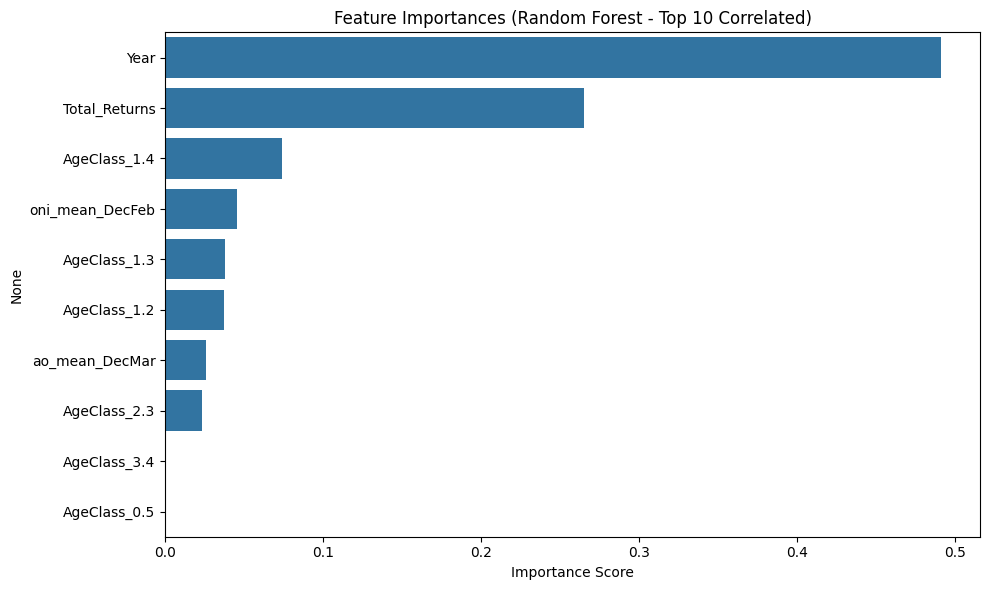

Random Forest Evaluation Metrics (Alagnak, Top 10 Features):
R²   (R-squared):              0.0283
MSE  (Mean Squared Error):     3386374415202.25
MAPE (Mean Absolute % Error):  35.77%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Keep only rows where River is 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Select top 10 features most correlated with the target ===
correlation = df_alagnak.corr(numeric_only=True)
target_corr = correlation['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top10_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Ensure no duplicate 'Year' column
columns_to_keep = top10_features + ['Total_Returns_NextYear', 'River']
if 'Year' not in top10_features:
    columns_to_keep.append('Year')

df_alagnak = df_alagnak[columns_to_keep]

# === Step 3: Define and apply time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 4: Prepare features and target ===
drop_columns = ['Total_Returns_NextYear', 'River']
if 'Year' not in top10_features:
    drop_columns.append('Year')

X_train = data_train.drop(drop_columns, axis=1)
y_train = data_train['Total_Returns_NextYear']

X_test = data_test.drop(drop_columns, axis=1)
y_test = data_test['Total_Returns_NextYear']

# === Step 5: Train Random Forest Regressor ===
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train)

# === Step 6: Feature Importances Plot ===
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest - Top 10 Correlated)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 7: Predict & Evaluate ===
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Random Forest Evaluation Metrics (Alagnak, Top 10 Features):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


Using the best model to predict 2023:

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate

# === Load data ===
file_path = r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
df = pd.read_csv(file_path)

# === Prepare results list ===
results = []

# === Loop through each river ===
for river in df['River'].unique():
    df_river = df[df['River'] == river].copy()

    # Ensure 2023 is available
    if 2023 not in df_river['Year'].values:
        print(f"Skipping {river} (no 2023 data)")
        continue

    # === Keep full feature set, then select top correlations AFTER ensuring original columns remain ===
    full_corr = df_river.corr(numeric_only=True)
    if 'Total_Returns_NextYear' not in full_corr.columns:
        print(f"Skipping {river} (no target correlation)")
        continue

    target_corr = full_corr['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
    top10 = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()

    # Force keeping Year and River so we don’t lose structure
    selected_columns = top10 + [col for col in ['Total_Returns_NextYear', 'Year', 'River'] if col not in top10]

    df_river = df_river[selected_columns].copy()

    # Sort to make sure years are ordered
    df_river = df_river.sort_values(by='Year').reset_index(drop=True)

    # === Prepare train/test split ===
    train = df_river[df_river['Year'] <= 2022].copy().sort_values(by='Year').reset_index(drop=True)
    test = df_river[df_river['Year'] == 2023].copy().reset_index(drop=True)

    if train.empty or test.empty:
        print(f"Skipping {river} (empty train/test)")
        continue

    drop_cols = ['Total_Returns_NextYear', 'River', 'Year']
    X_train = train.drop(columns=drop_cols).reset_index(drop=True)
    y_train = train['Total_Returns_NextYear'].reset_index(drop=True)
    X_test = test.drop(columns=drop_cols).reset_index(drop=True)

    # === Train model ===
    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)[0]

    # === Compare with actual ===
    actual = test['Total_Returns_NextYear'].values[0]
    error = abs(y_pred - actual)
    perc_error = (error / actual) * 100 if actual != 0 else np.nan

    results.append([
        river,
        f"{y_pred:,.0f}",
        f"{actual:,.0f}",
        f"{error:,.0f}",
        f"{perc_error:.2f}%"
    ])

# === Print final results table ===
headers = ["River", "Prediction (2023)", "Actual", "Absolute Error", "Percentage Error"]
print(tabulate(results, headers=headers, tablefmt="grid"))


+----------+---------------------+------------+------------------+--------------------+
| River    | Prediction (2023)   | Actual     | Absolute Error   | Percentage Error   |
+==========+=====================+============+==================+====================+
| Alagnak  | 1,889,745           | 4,335,435  | 2,445,690        | 56.41%             |
+----------+---------------------+------------+------------------+--------------------+
| Egegik   | 10,851,856          | 4,629,743  | 6,222,113        | 134.39%            |
+----------+---------------------+------------+------------------+--------------------+
| Igushik  | 1,256,321           | 1,572,250  | 315,929          | 20.09%             |
+----------+---------------------+------------+------------------+--------------------+
| Kvichak  | 7,120,308           | 12,207,053 | 5,086,745        | 41.67%             |
+----------+---------------------+------------+------------------+--------------------+
| Naknek   | 6,619,480          

In [3]:
data_set_bristol['River'].unique()

array(['Alagnak', 'Egegik', 'Igushik', 'Kvichak', 'Naknek', 'Nushagak',
       'Ugashik', 'Wood'], dtype=object)

this was the best model so ill do something different here test all features removing one by one

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Filter only Alagnak
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# Sort by Year for consistency
df_alagnak = df_alagnak.sort_values(by='Year').reset_index(drop=True)

# === Step 2: Get all features (excluding target and River)
# Keep only numeric features except the target
all_features = df_alagnak.select_dtypes(include=[np.number]).drop(columns=['Total_Returns_NextYear']).columns.tolist()


# Define columns to keep and ensure clean structure
columns_to_keep = all_features + ['Total_Returns_NextYear', 'River']
df_alagnak = df_alagnak[columns_to_keep]

# === Step 3: Time-series split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()
    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)
    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak, time_column="Year", group_columns=["River"],
    test_fraction=0.2, gap_years=0
)

# === Step 4: Iterative feature removal ===
for i in range(len(all_features)):
    current_features = all_features[:len(all_features) - i]
    if len(current_features) == 0:
        break

    X_train = data_train[current_features]
    y_train = data_train['Total_Returns_NextYear']
    X_test = data_test[current_features]
    y_test = data_test['Total_Returns_NextYear']

    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    removed = all_features[len(current_features):]
    print(f"=== Removed {i} feature(s) → {removed} ===")
    print(f"Remaining Features: {len(current_features)}")
    print(f"R²   (R-squared):              {r2:.4f}")
    print(f"MSE  (Mean Squared Error):     {mse:.2f}")
    print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%\n")


=== Removed 0 feature(s) → [] ===
Remaining Features: 28
R²   (R-squared):              -0.0160
MSE  (Mean Squared Error):     3540965175389.54
MAPE (Mean Absolute % Error):  41.50%

=== Removed 1 feature(s) → ['sss_mayaug'] ===
Remaining Features: 27
R²   (R-squared):              0.0096
MSE  (Mean Squared Error):     3451547796740.79
MAPE (Mean Absolute % Error):  40.30%

=== Removed 2 feature(s) → ['pdo_mean_MaySep', 'sss_mayaug'] ===
Remaining Features: 26
R²   (R-squared):              -0.0271
MSE  (Mean Squared Error):     3579681265803.39
MAPE (Mean Absolute % Error):  41.92%

=== Removed 3 feature(s) → ['pdo_mean_DecMar', 'pdo_mean_MaySep', 'sss_mayaug'] ===
Remaining Features: 25
R²   (R-squared):              -0.0672
MSE  (Mean Squared Error):     3719451954684.60
MAPE (Mean Absolute % Error):  42.30%

=== Removed 4 feature(s) → ['ao_mean_DecMar', 'pdo_mean_DecMar', 'pdo_mean_MaySep', 'sss_mayaug'] ===
Remaining Features: 24
R²   (R-squared):              -0.0264
MSE  (Mean S

****************************************************************************

Random Forest Updated Code with Log Transform on Target

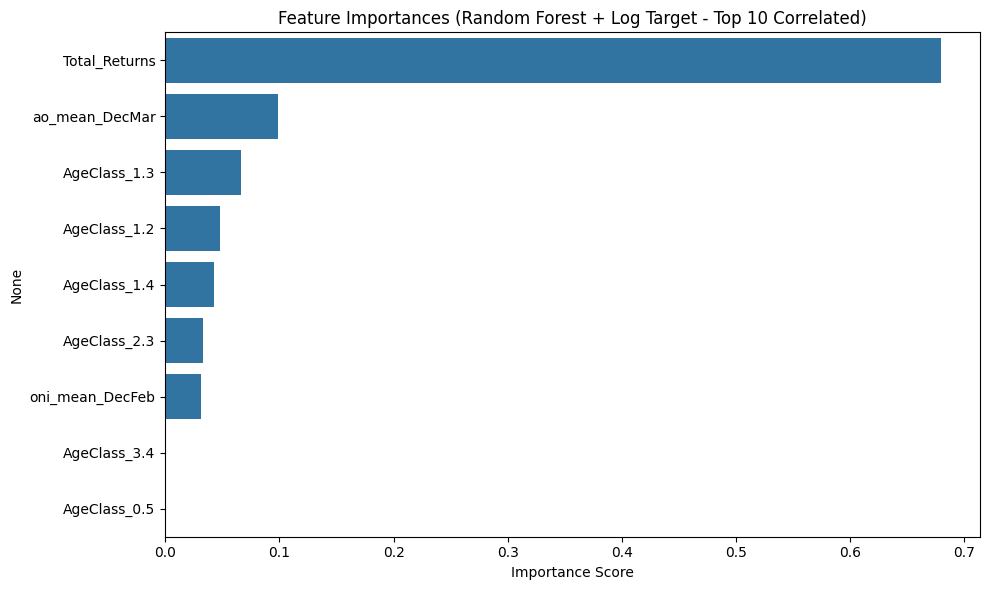

Random Forest with Log-Transformed Target (Alagnak, Top 10 Features):
R²   (R-squared):              -0.3730
MSE  (Mean Squared Error):     4785084733265.15
MAPE (Mean Absolute % Error):  28.87%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Filter only 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Select top 10 correlated features ===
correlation = df_alagnak.corr(numeric_only=True)
target_corr = correlation['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top10_features = target_corr.abs().sort_values(ascending=False).head(10).index.tolist()

# Preserve column order and add essentials if missing
columns_to_keep = top10_features + [col for col in ['Total_Returns_NextYear', 'Year', 'River'] if col not in top10_features]
df_alagnak = df_alagnak[columns_to_keep].sort_values(by='Year').reset_index(drop=True)

# === Step 3: Time-based train/test split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 4: Prepare features and log-transformed target ===
drop_columns = ['Total_Returns_NextYear', 'River', 'Year']
X_train = data_train.drop(columns=drop_columns).reset_index(drop=True)
y_train_log = np.log1p(data_train['Total_Returns_NextYear']).reset_index(drop=True)

X_test = data_test.drop(columns=drop_columns).reset_index(drop=True)
y_test = data_test['Total_Returns_NextYear'].reset_index(drop=True)

# === Step 5: Train Random Forest ===
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
rf.fit(X_train, y_train_log)

# === Step 6: Feature Importances ===
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest + Log Target - Top 10 Correlated)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 7: Predict & Reverse Log ===
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)  # inverse of log1p

# === Step 8: Evaluation ===
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Random Forest with Log-Transformed Target (Alagnak, Top 10 Features):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 Random Forest + Log-Transform + GridSearchCV (Alagnak only):

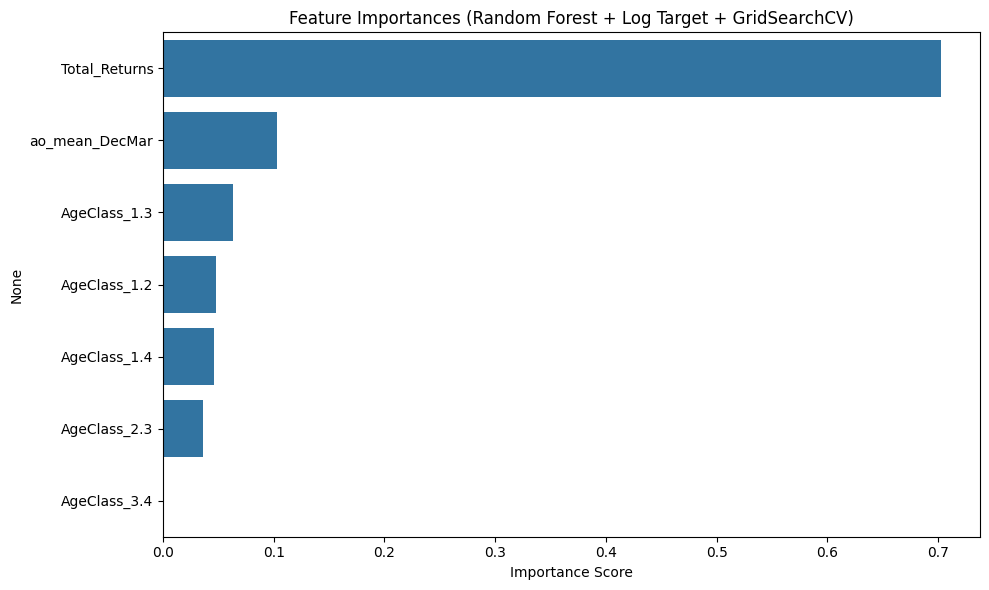

Random Forest + Log-Transformed Target + GridSearchCV (Alagnak, Top 8 Features):
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R²   (R-squared):              -0.3843
MSE  (Mean Squared Error):     4824448852200.56
MAPE (Mean Absolute % Error):  29.90%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Filter only 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Select top 8 correlated features ===
correlation = df_alagnak.corr(numeric_only=True)
target_corr = correlation['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top8_features = target_corr.abs().sort_values(ascending=False).head(8).index.tolist()

# Keep consistent structure and sort by year
columns_to_keep = top8_features + [col for col in ['Total_Returns_NextYear', 'Year', 'River'] if col not in top8_features]
df_alagnak = df_alagnak[columns_to_keep].sort_values(by='Year').reset_index(drop=True)

# === Step 3: Time-based split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 4: Prepare features and log target ===
drop_columns = ['Total_Returns_NextYear', 'River', 'Year']
X_train = data_train.drop(columns=drop_columns).reset_index(drop=True)
y_train_log = np.log1p(data_train['Total_Returns_NextYear']).reset_index(drop=True)

X_test = data_test.drop(columns=drop_columns).reset_index(drop=True)
y_test = data_test['Total_Returns_NextYear'].reset_index(drop=True)

# === Step 5: GridSearchCV for Random Forest ===
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1
)
grid_search.fit(X_train, y_train_log)

best_rf = grid_search.best_estimator_

# === Step 6: Feature Importances ===
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (Random Forest + Log Target + GridSearchCV)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 7: Predict and inverse log ===
y_pred_log = best_rf.predict(X_test)
y_pred = np.expm1(y_pred_log)

# === Step 8: Evaluate ===
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# === Step 9: Report ===
print("Random Forest + Log-Transformed Target + GridSearchCV (Alagnak, Top 8 Features):")
print(f"Best Params: {grid_search.best_params_}")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


XGBoost Regressor

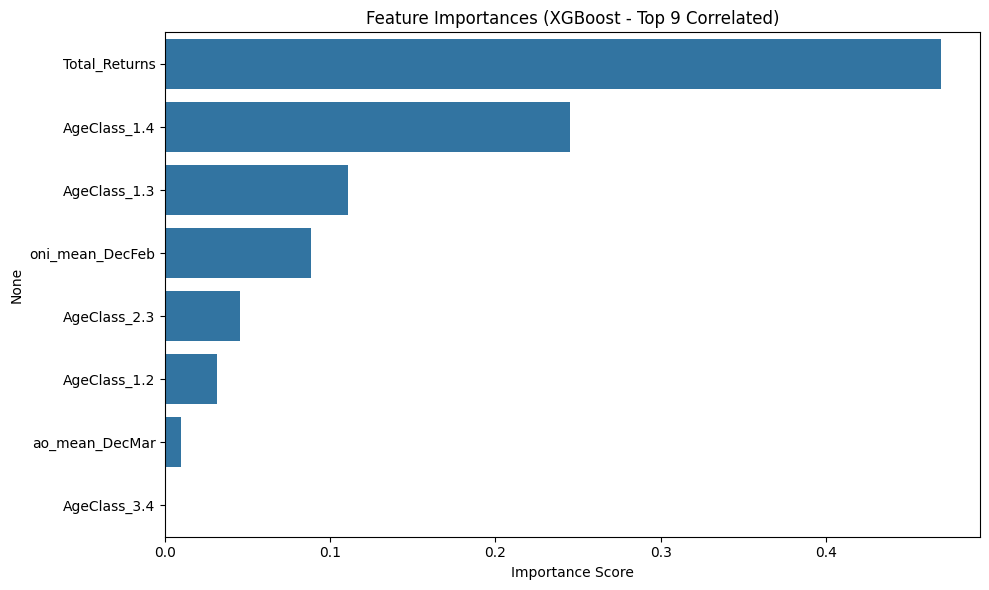

XGBoost Evaluation Metrics (Alagnak, Top 9 Features):
R²   (R-squared):              -0.4310
MSE  (Mean Squared Error):     4987293784854.80
MAPE (Mean Absolute % Error):  32.88%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# === Step 1: Load and filter data ===
data_set_bristol = pd.read_csv(
    r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\THIRD_APPROACH\data_set_bristol_encoded.csv'
)

# Filter only 'Alagnak'
df_alagnak = data_set_bristol[data_set_bristol['River'] == 'Alagnak'].copy()

# === Step 2: Select top 9 features most correlated with the target ===
correlation = df_alagnak.corr(numeric_only=True)
target_corr = correlation['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top9_features = target_corr.abs().sort_values(ascending=False).head(9).index.tolist()

# Keep top 9 + target + Year + River (preserving order and avoiding duplicates)
columns_to_keep = top9_features + [col for col in ['Total_Returns_NextYear', 'Year', 'River'] if col not in top9_features]
df_alagnak = df_alagnak[columns_to_keep].sort_values(by='Year').reset_index(drop=True)

# === Step 3: Time-based train/test split ===
def split_time_series_by_river(df, time_column, group_columns, test_fraction=0.2, gap_years=0):
    data_train = pd.DataFrame()
    data_test = pd.DataFrame()

    for _, group_df in df.groupby(group_columns):
        group_df = group_df.sort_values(by=time_column)
        split_idx = int(len(group_df) * (1 - test_fraction))
        train_split = group_df.iloc[:split_idx - gap_years]
        test_split = group_df.iloc[split_idx:]
        data_train = pd.concat([data_train, train_split], axis=0)
        data_test = pd.concat([data_test, test_split], axis=0)

    return data_train.reset_index(drop=True), data_test.reset_index(drop=True)

data_train, data_test = split_time_series_by_river(
    df_alagnak,
    time_column="Year",
    group_columns=["River"],
    test_fraction=0.2,
    gap_years=0
)

# === Step 4: Prepare features and target ===
drop_columns = ['Total_Returns_NextYear', 'River', 'Year']
X_train = data_train.drop(columns=drop_columns).reset_index(drop=True)
y_train = data_train['Total_Returns_NextYear'].reset_index(drop=True)

X_test = data_test.drop(columns=drop_columns).reset_index(drop=True)
y_test = data_test['Total_Returns_NextYear'].reset_index(drop=True)

# === Step 5: Train XGBoost Regressor ===
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# === Step 6: Feature Importances ===
feature_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Feature Importances (XGBoost - Top 9 Correlated)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# === Step 7: Predict & Evaluate ===
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("XGBoost Evaluation Metrics (Alagnak, Top 9 Features):")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")
